In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris() # iris data set
X = iris.data
y = iris.target
print(iris.keys())
features=iris.feature_names
target_names = iris.target_names
print(features)
print(target_names)
colors = ['navy', 'turquoise', 'darkorange']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


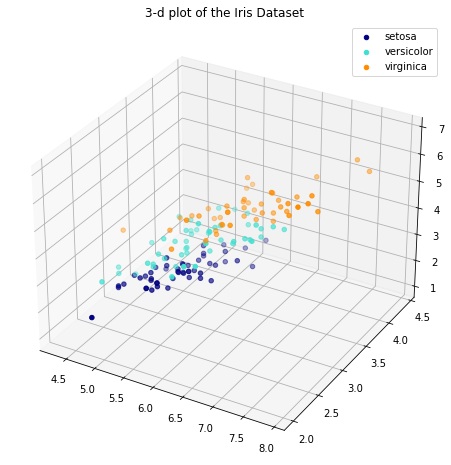

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-d plot of the Iris Dataset")
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(X[y == i, 0], X[y == i, 1],X[y == i, 2], color = color,
                label = target_name)
plt.legend(loc='best')
plt.show()    

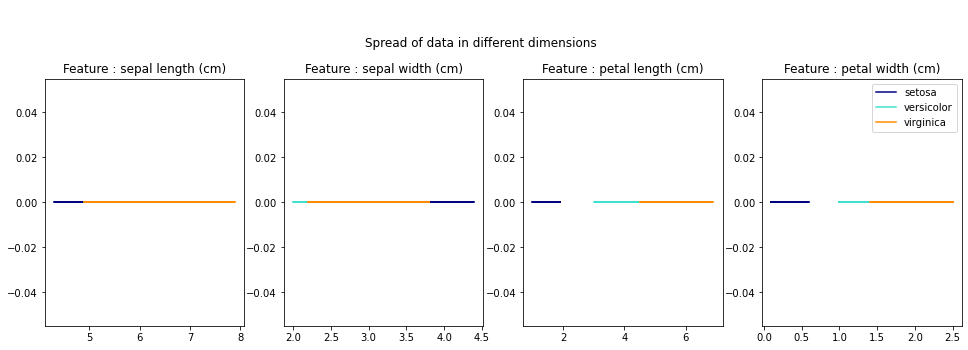

In [4]:
# Create figure
fig = plt.figure(figsize=(25, 10))
fig.suptitle("\n\nSpread of data in different dimensions" )

# Plot results
for j in range(4):
    ax = fig.add_subplot(2, 6, 2 + j + (j >3))
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        ax.set_title("Feature : %s" %(features[j]))
        ax.plot(X[y == i, j],np.zeros_like(X[y == i, j]), color=color,label=target_name)
plt.legend(loc='best')
plt.show()

In [5]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Use a Decision Tree classifier to evaluate the methods
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)
acc = tree.score(X_test,y_test)
print("Without LDA",acc)

Without LDA 0.9111111111111111


In [6]:
lda2 = LinearDiscriminantAnalysis(n_components=2) # model for reduction in 2D
lda1 = LinearDiscriminantAnalysis(n_components=1) # model for reduction in 1D

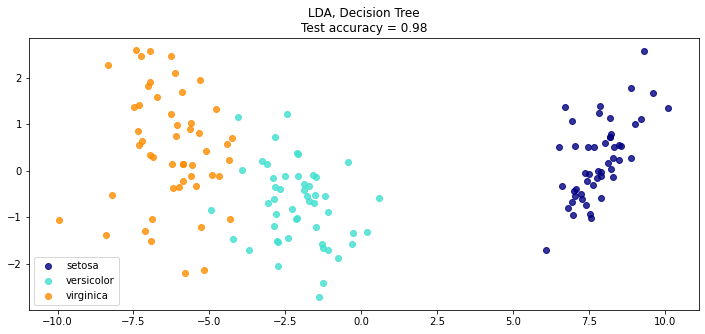

In [7]:
# Fit the method's model
lda2.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(lda2.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(lda2.transform(X_test), y_test)
X_2 = lda2.transform(X)
plt.figure(figsize=(12,5))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_2[y == i, 0], X_2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()

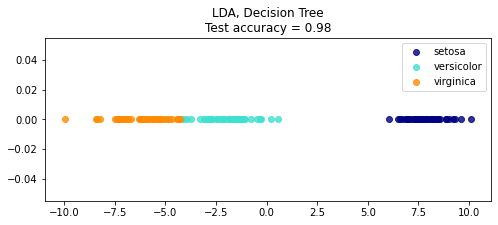

In [8]:
# Fit the method's model
lda1.fit(X_train, y_train)

# Fit a Decision Tree classifier on the embedded training set
tree.fit(lda1.transform(X_train), y_train)

# Compute the Decision Tree accuracy on the embedded test set
acc = tree.score(lda1.transform(X_test), y_test)
X_1 = lda1.transform(X)
plt.figure(figsize=(8,3))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_1[y == i, 0],np.zeros_like(X[y == i, j]), alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best')
plt.title("LDA, Decision Tree\nTest accuracy = {:.2f}".format(acc))
plt.show()